# Clustering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv("E:\Dataset\Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
# prepare data
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary', '#']
df = df[types].drop(columns = drop_cols)
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


In [6]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.04670667, -1.0656062 , -0.97922366, ..., -0.4731103 ,
        -0.23341728, -0.84865276],
       [-0.26037306, -0.43004498, -0.51174118, ...,  0.0424492 ,
         0.36330133, -0.2604278 ],
       [ 0.82422501,  0.41736997,  0.20746264, ...,  0.72986187,
         1.15892616,  0.52387214],
       ...,
       [-0.93824686, -0.85375246, -0.8353829 , ..., -0.71370473,
        -0.31297976, -0.88786776],
       [ 0.59826708,  0.03603324, -0.11617908, ...,  1.41727454,
         0.72133251, -0.2996428 ],
       [ 1.50209881,  0.41736997,  1.21434799, ...,  1.76098087,
         0.76111375,  0.13172217]])

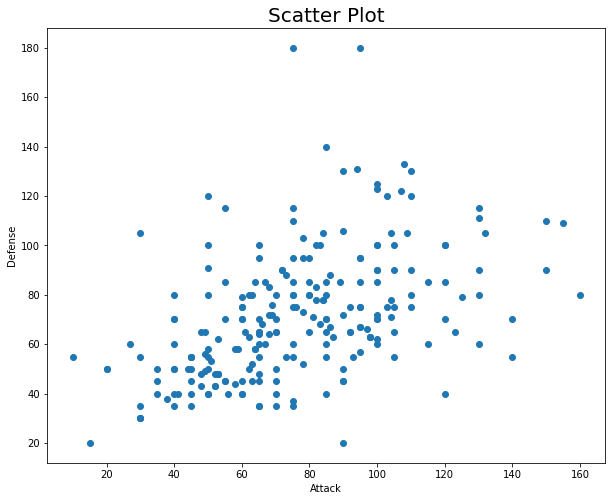

In [7]:
fig = plt.figure(1, figsize=(10, 8))
plt.scatter(df['Attack'], df['Defense'])
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.title("Scatter Plot", size = 20)
plt.show()

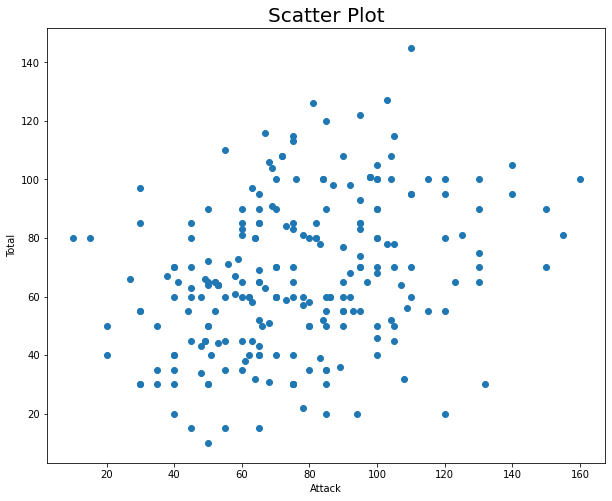

In [8]:
fig = plt.figure(1, figsize=(10, 8))
plt.scatter(df['Attack'], df['Speed'])
plt.xlabel("Attack")
plt.ylabel("Total")
plt.title("Scatter Plot", size = 20)
plt.show()

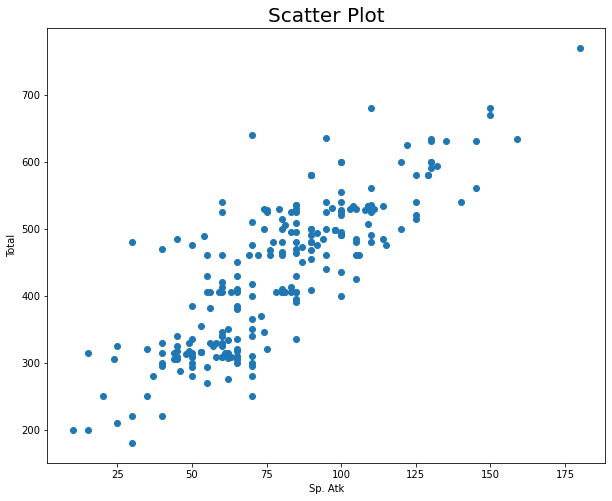

In [9]:
fig = plt.figure(1, figsize=(10, 8))
plt.scatter(df['Sp. Atk'], df['Total'])
plt.xlabel("Sp. Atk")
plt.ylabel("Total")
plt.title("Scatter Plot", size = 20)
plt.show()

In [10]:
sum_distances = []
K = range(1,11)
for k in K:
    k_mean =  KMeans(n_clusters = k)
    k_mean.fit(X)
    sum_distances.append(k_mean.inertia_)
    

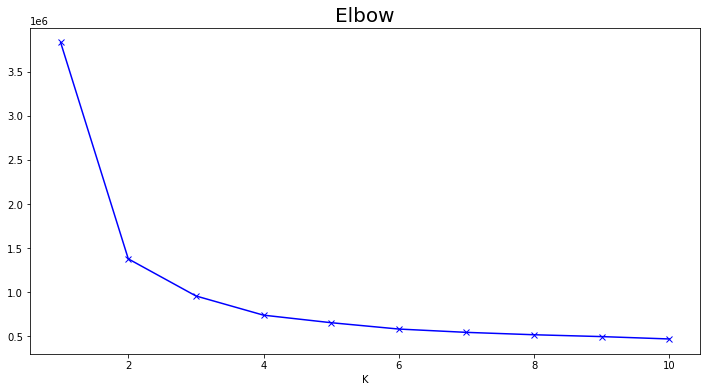

In [18]:
fig = plt.figure(1, figsize=(12, 6))
plt.plot(K, sum_distances, "bx-")
plt.xlabel("K")
plt.title("Elbow", size = 20)
plt.show()

In [11]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['RED', 'GREEN', 'BLUE']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

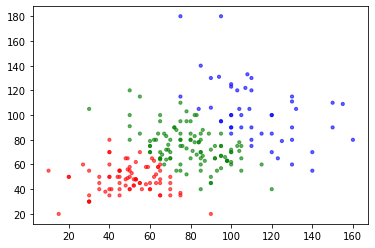

In [12]:
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.show()

In [11]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(Clus_dataSet)
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['RED', 'GREEN', 'BLUE']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

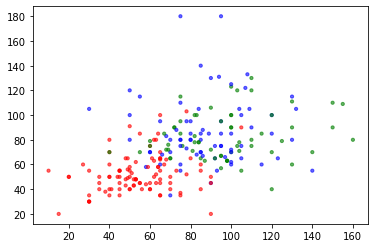

In [23]:
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.show()

In [14]:
k_mean_3 = KMeans(n_clusters=3)
model = k_mean_3.fit(Clus_dataSet)
result = k_mean_3.labels_

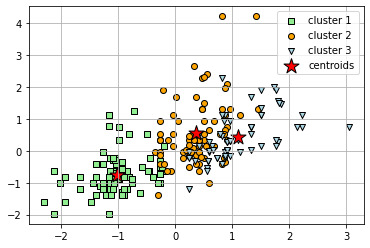

In [15]:
plt.scatter(
    Clus_dataSet[result == 0, 0], Clus_dataSet[result == 0, 3],
    c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    Clus_dataSet[result == 1, 0], Clus_dataSet[result == 1, 3],
    c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    Clus_dataSet[result == 2, 0], Clus_dataSet[result == 2, 3],
    c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 3],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
### multi variables

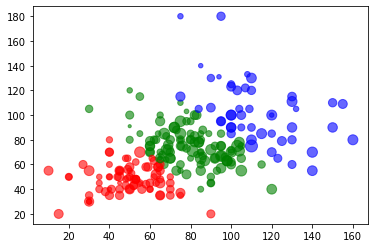

In [16]:
plt.scatter(df.Attack, df.Defense, c=df.c, s=df.Speed, alpha = 0.6)

In [17]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense', 'HP']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, s=15)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
#ax.set_title("K-means clustering")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 6))  
plt.title("Dendrograms\n", size = 14)  
dend = shc.dendrogram(shc.linkage(df[['Attack', 'Defense']], method='ward'))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [60]:
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,cen_x,cen_y,c
0,Bulbasaur,318,45,49,49,65,65,45,0,49.875000,48.075000,RED
1,Ivysaur,405,60,62,63,80,80,60,0,49.875000,48.075000,RED
2,Venusaur,525,80,82,83,100,100,80,1,79.801887,74.386792,GREEN
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,112.270833,102.479167,BLUE
4,Charmander,309,39,52,43,60,50,65,0,49.875000,48.075000,RED


### K = 3,  Attack, Defense, HP

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense', 'HP']])

In [31]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_vals = silhouette_score(Clus_dataSet,df['cluster'], metric='euclidean')
silhouette_vals 

0.26816398355505067

In [30]:
#### total val

### K = 3 với tất cả feature

In [33]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_vals = silhouette_score(Clus_dataSet, result, metric='euclidean')
silhouette_vals 

0.2614511403463336

### K = 2 với tất cả feature

In [34]:
k_mean_2 = KMeans(n_clusters=2)
model = k_mean_2.fit(Clus_dataSet)
result = k_mean_2.labels_

In [35]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_vals = silhouette_score(Clus_dataSet, result, metric='euclidean')
silhouette_vals 

0.35760610495436984

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("E:\Dataset\styles.csv")
df.head()